# Task 3 EDA - Cris Grace

*Research Question 1 - What period saw the most community spread during the pandemic ?*

*Research Question 2 - Did the resulting community spread contribute to herd immunity and lead to a reduction of deaths, new cases and total cases?*

# Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load, Process and Get Daily Cases

In [2]:
def load_and_process(url):
    #Load In Dataframe
    df = pd.read_csv(url).dropna()
    #Process Dataframe
    df["Date"] = pd.to_datetime(df["Date"])
    return df
    
def getDailyCases(df):
    dc = [0]
    tc = list(df["Total_Cases"])
    i = 0
    while (i < len(tc)):
        try:
            change = (int(tc[i+1] - tc[i]))
            dc.append(change)
            i+=1
        except:
            break
    df["New Cases"] = dc
    return df

def getDailyDeaths(df):
    dd = [0]
    td = list(df["Total_Deaths"])
    i = 0
    while (i < len(td)):
        try:
            change = (int(td[i+1] - td[i]))
            dd.append(change)
            i+=1
        except:
            break
    df["New Deaths"] = dd
    return df

# Calling Method To Load And Process 

In [3]:
covidDf = load_and_process("D:\\Summer Term - Term 2\\project-group18-project\\analysis\\Chris\\worldometers_snapshots_April18_to_September20.csv")

# Choosing 5 Countries To Analyse and Creating Dataframes With Data From Those Countries

In [4]:
#United States Of America - COVID-19

#I took this approach because it is easier to isolate the countries than to filter it

USAdf = covidDf.loc[covidDf["Country"] == "USA"]
USAdf = getDailyCases(USAdf).reset_index().drop('index', axis = 1)
USAdf = getDailyDeaths(USAdf)
#Brazil - COVID-19
BRAZILdf = covidDf.loc[covidDf["Country"] == "Brazil"]
BRAZILdf = getDailyCases(BRAZILdf).reset_index().drop('index', axis = 1)
BRAZILdf = getDailyDeaths(BRAZILdf)
#Russia - COVID-19
RUSSIAdf = covidDf.loc[covidDf["Country"] == "Russia"]
RUSSIAdf = getDailyCases(RUSSIAdf).reset_index().drop('index', axis = 1)
RUSSIAdf = getDailyDeaths(RUSSIAdf)
#India - COVID-19
INDIAdf = covidDf.loc[covidDf["Country"] == "India"]
INDIAdf = getDailyCases(INDIAdf).reset_index().drop('index', axis = 1)
INDIAdf = getDailyDeaths(INDIAdf)
#France - COVID-19
FRANCEdf = covidDf.loc[covidDf["Country"] == "France"]
FRANCEdf = getDailyCases(FRANCEdf).reset_index().drop('index', axis = 1)
FRANCEdf = getDailyDeaths(FRANCEdf)

#Combined The Dataframes
combinedDf = USAdf.append([BRAZILdf, RUSSIAdf, INDIAdf, FRANCEdf])
combinedDf = combinedDf.sort_values(by = "Date")
combinedDf = combinedDf.drop(combinedDf["New Cases"].idxmin()).drop(combinedDf["New Deaths"].idxmin()).reset_index().drop("index", axis = 1)

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


## Describing The Dataframe and Displaying The Head

In [5]:
combinedDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,735.0,3.822378e+08,4.491488e+08,65306406.0,145948762.0,212900304.0,331441624.0,1.383049e+09
Total_Tests,735.0,1.890897e+07,2.185337e+07,62985.0,2982302.0,10740832.0,27569646.0,9.816661e+07
Total_Cases,735.0,1.599883e+06,1.760738e+06,36722.0,221305.5,856264.0,2433824.0,7.009844e+06
Total_Deaths,735.0,5.564356e+04,5.323147e+04,313.0,15930.5,30324.0,87365.5,2.041180e+05
Total_Recovered,735.0,9.557990e+05,1.155230e+06,3057.0,83472.0,453568.0,1374306.5,4.392650e+06
Serious_or_Critical,735.0,7.362088e+03,5.637412e+03,8.0,2300.0,8318.0,8944.0,1.917900e+04
Active_Cases,735.0,5.884962e+05,6.792847e+05,14062.0,124178.5,236714.0,757758.5,2.571758e+06
New Cases,735.0,2.366648e+04,2.344911e+04,-1694.0,5254.0,14288.0,40337.0,9.785900e+04
New Deaths,735.0,5.558694e+02,5.231197e+02,-12.0,104.0,412.0,959.0,2.804000e+03


In [6]:
combinedDf.head()

,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Serious_or_Critical,Active_Cases,New Cases,New Deaths
0,2020-04-18,USA,331441624,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0,0
1,2020-04-18,Brazil,212900304,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0,0
2,2020-04-18,France,65306406,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0,0,0
3,2020-04-18,Russia,145948762,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0,0
4,2020-04-19,Russia,145948762,1940000.0,42853.0,361.0,3291.0,8.0,39201.0,6060,48


In [7]:
combinedDf.tail()

,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Serious_or_Critical,Active_Cases,New Cases,New Deaths
730,2020-09-20,India,1383048851,63661060.0,5485612.0,87909.0,4392650.0,8944.0,1005053.0,87382,1135
731,2020-09-20,USA,331441624,98166609.0,7009844.0,204118.0,4251489.0,14020.0,2554237.0,42441,294
732,2020-09-20,Russia,145948762,42821891.0,1103399.0,19418.0,909357.0,2300.0,174624.0,6148,79
733,2020-09-20,Brazil,212900304,15011116.0,4544629.0,136895.0,3851227.0,8318.0,556507.0,16282,330
734,2020-09-20,France,65306406,10000000.0,452763.0,31285.0,91574.0,827.0,329904.0,10569,11


# Visualization Of The Data

### Change in cases and deaths by country during the first wave of Covid 

*First wave of COVID-19 is defined as the spread of the original SARS-COV-2 virus, which happened between Feb and September of 2020.*

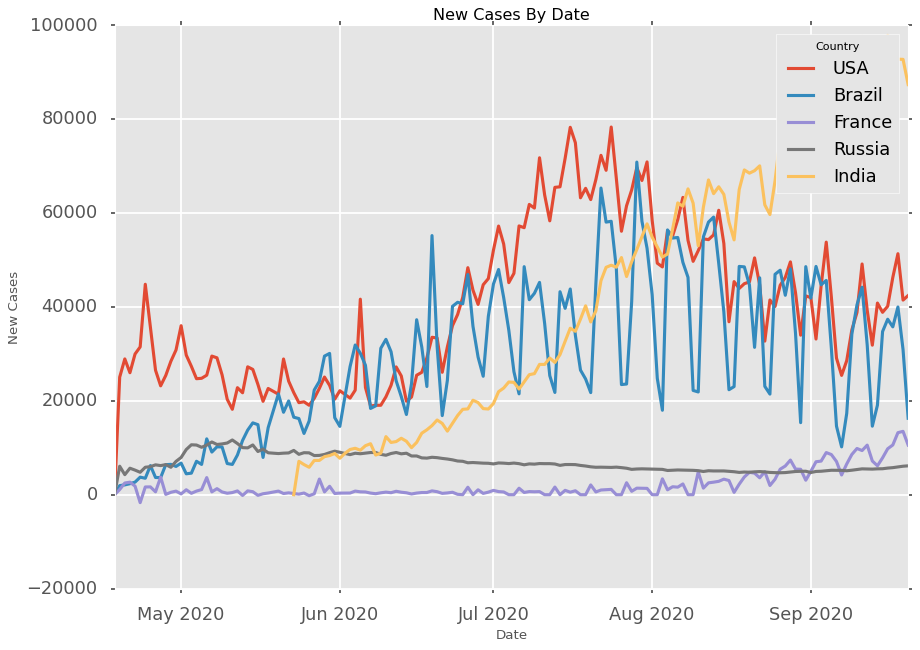

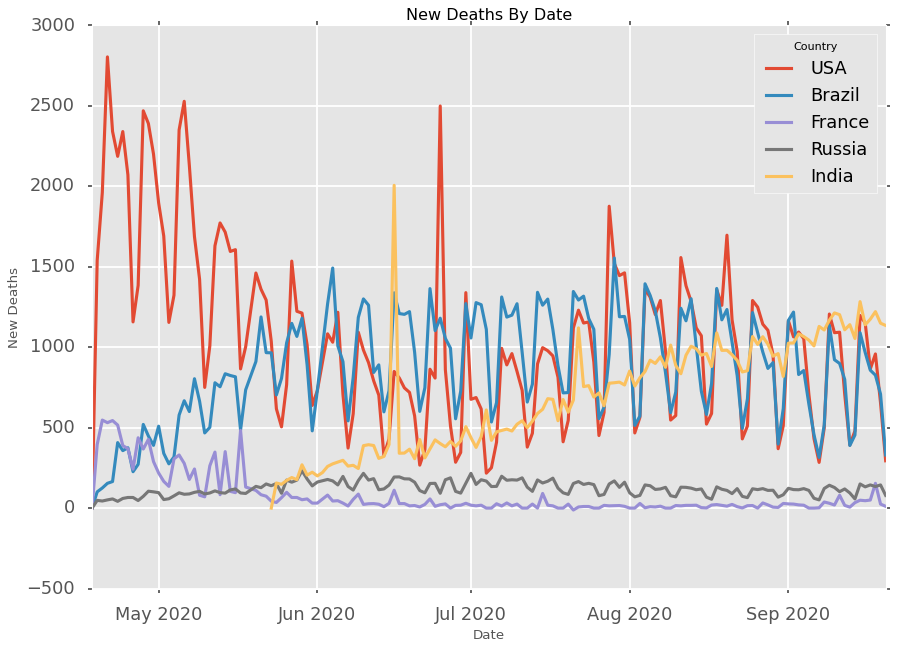

In [38]:
# Combining The Data To Create Some Visualizations
plt.style.use("ggplot")
sns.lineplot(y="New Cases", x="Date", hue="Country",data = combinedDf)
plt.title("New Cases By Date")
plt.show()
sns.lineplot(y="New Deaths", x="Date", hue="Country",data = combinedDf)
plt.title("New Deaths By Date")
plt.show()

 #### Observations
 - The US and India had the greatest increase in COVID-19
 - Brazil, India and The US all had similar case counts in July and August of 2020
 - As Brazil and the US declined India continued to rise. France too saw a smaller increase during this time.
 - Russia peaked in May and continued to drop, but picked up once more in September
 - Community Spread seems to have eased around September in Brazil and Russia, and happened a lot later in other countries.

 #### Notes
 - The lowest value is dropped because it is an outlier and does not go with the general trend of the data.
 - The Dataframes are combined in order to make it easier to create a graph.
 - They are sorted to be shown by date.
 - Graph may be missing data points due to unreported variables.

## Correlation Between New Cases And New Deaths

*Seeing how they relate and build on top of each other.*

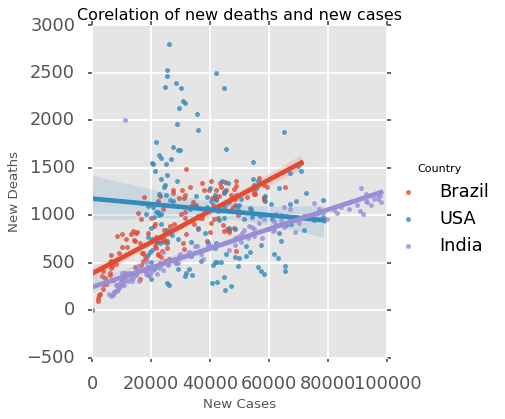

In [37]:
plt.style.use("ggplot")
NCND = BRAZILdf.append([USAdf, INDIAdf])
sns.lmplot(x ='New Cases', y ='New Deaths',hue = "Country" ,data = NCND)
plt.title("Corelation of new deaths and new cases")
plt.show()


#### Observation
- When cases are high, there are many points where deaths are suprisingly low.
- This can be attributed to the fact that the large amount of infections led to more people being infected hence leading to immunity
- This new immunity leads to lower deaths.
- In places and periods where cases are consistantly low, an outbreak leads to more deaths as we can see in Brazil where average amount of cases still meant high deaths


#### Notes
- N/A

# Analysis

## Answering Research Question 

*Research Question 1 - What period saw the most community spread during the pandemic ?*

By looking at the graph above it can be said that the peak in  India was in September, In the US and Brazil it was in July, France peaked in May and Russia peaked in June. Among these nations France, India had nationwide lockdowns and the rest had lockdowns determined by States and Provinces around this same time. After these nations and inturn provinces and states unlocked however, cases started to increase vastly.We can say the periods where they peaked is when community spread was at its peak.

Research Question 2 - Did the resulting community spread contribute to herd immunity and lead to a reduction of deaths ?

In 4/5 countries the resulting community spread contributed to a reduction of deaths. In the US, during the peak we can see that the cases were at an all time high however deaths were still quite low, this is because the peak led to a large amount of people being infected and hence a lower amount of deaths as re-infections were milder.In Brazil, France and Russia a similar trend emerges. We can hence say that the community spread led to a reduction of cases, and herd immunity did play a part in ending the first wave. 